# Leveraged ETFs Volatily Drag

In [44]:
%load_ext autoreload
%autoreload 2

import fin
import csv
import pandas
import numpy
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
prices = fin.load_yahoo_csv('QQQ-prices.csv')

Read prices: 5835row [00:00, 83717.07row/s]


In [57]:
def leveraged_return_diff(pct_deltas, window, leverage=3.0): 
    data = []
    for i in range(len(pct_deltas)-window):
        x_window = pct_deltas[i:i+window]
        x_leveraged = x_window*leverage
        ret, vol = numpy.prod(x_window+1)-1, fin.annualized_volatility(x_window)
        ret_leveraged = numpy.prod(x_leveraged+1)-1
        diff = ret_leveraged - ret*leverage
        data.append((pct_deltas.index[i+window-1], ret, ret_leveraged, vol, diff))

    return pandas.DataFrame(data, columns=['date', 'return_1', 'return_3', 'volatility', 'return_diff'])

# QQQ / TQQQ (3x) difference: 4 weeks

In [58]:
df = leveraged_return_diff(prices.adjusted_close.pct_change(), window=4*5)

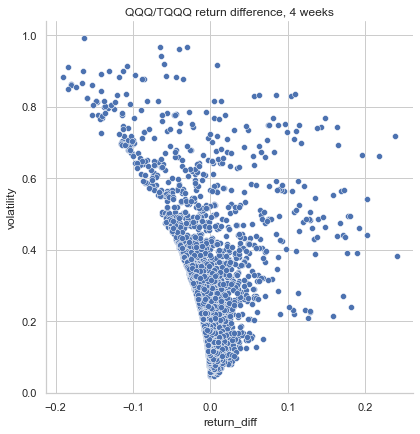

In [59]:
fig = sns.relplot(data=df, x='return_diff', y='volatility', height=6, aspect=1/1)
fig.set(title='QQQ/TQQQ return difference, 4 weeks')

Text(0.5, 0.98, 'QQQ/TQQQ return difference, 4 weeks')

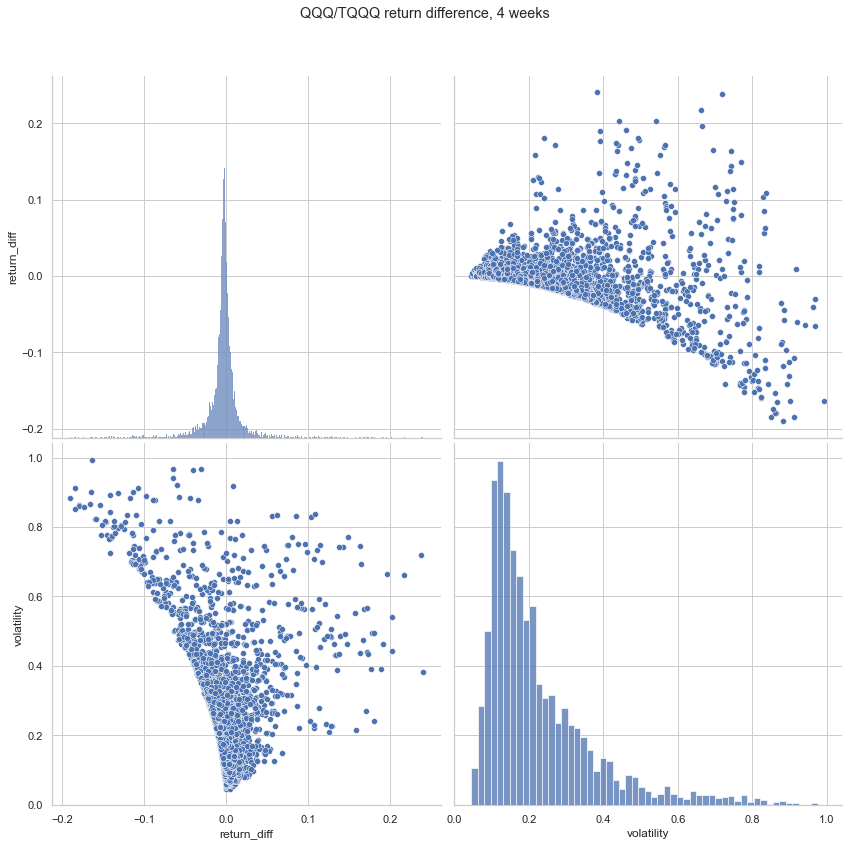

In [60]:
plot = sns.pairplot(df[['return_diff', 'volatility']], height=6, aspect=1/1)
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('QQQ/TQQQ return difference, 4 weeks')

# QQQ / TQQQ (3x) difference: 12 weeks (~3 months)

In [61]:
df = leveraged_return_diff(prices.adjusted_close.pct_change(), window=12*5)

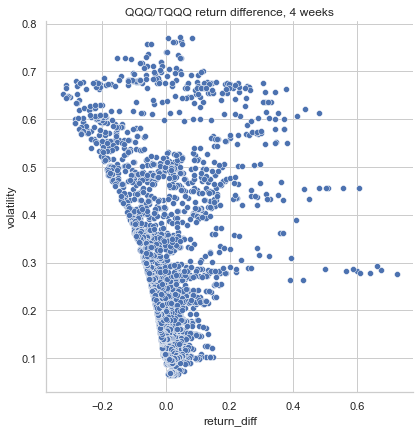

In [62]:
fig = sns.relplot(data=df, x='return_diff', y='volatility', height=6, aspect=1/1)
fig.set(title='QQQ/TQQQ return difference, 4 weeks')

# QQQ / TQQQ (3x) difference: 48 weeks (~1 year)

In [63]:
df = leveraged_return_diff(prices.adjusted_close.pct_change(), window=48*5)

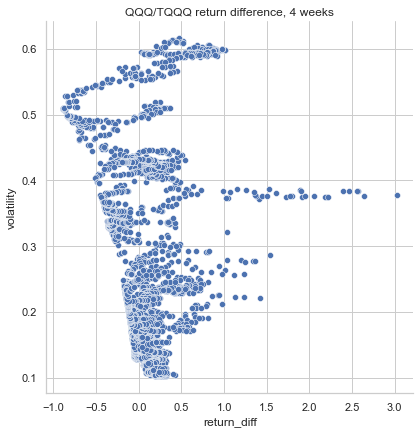

In [64]:
fig = sns.relplot(data=df, x='return_diff', y='volatility', height=6, aspect=1/1)
fig.set(title='QQQ/TQQQ return difference, 4 weeks')